In [38]:
import pandas as pd
import numpy as np

InfoPath = "FETAL_PLANES_DB_data.csv"

image_info = pd.read_csv(InfoPath, header = 0, sep = ';')

In [8]:
print(image_info.shape)

(12400, 7)


In [9]:
image_info.head()

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15,1,Other,Not A Brain,Other,Aloka,1


In [33]:
# sampling 100 images from each class, overall it would be 900 images
np.random.seed(33)
# other : 1
image_other = image_info.loc[image_info['Plane'] == 'Other'].sample(n = 100)
# abdomen : 2
image_abdomen = image_info.loc[image_info['Plane'] == 'Fetal abdomen'].sample(n = 100)
# femur : 3
image_femur = image_info.loc[image_info['Plane'] == 'Fetal femur'].sample(n = 100)
# thorax : 4
image_thorax = image_info.loc[image_info['Plane'] == 'Fetal thorax'].sample(n = 100)
# Mother cervix : 5
image_cervix = image_info.loc[image_info['Plane'] == 'Maternal cervix'].sample(n = 100)
# brain_thalamic : 6
image_thalamic = image_info.loc[image_info['Brain_plane'] == 'Trans-thalamic'].sample(n = 100)
# brain_cerebellum : 7
image_cerebellum = image_info.loc[image_info['Brain_plane'] == 'Trans-cerebellum'].sample(n = 100)
# brain_ventricular : 8
image_ventricular = image_info.loc[image_info['Brain_plane'] == 'Trans-ventricular'].sample(n = 100)
# brain_other : 9
image_brain_other = image_info.loc[image_info['Brain_plane'] == 'Other'].sample(n = 100)

In [67]:
# combine all samples together
sample = pd.concat([image_other, image_abdomen, image_femur, image_thorax, image_cervix, image_thalamic,
                    image_cerebellum, image_ventricular, image_brain_other, pd.DataFrame(columns = ['label'])])


/Users/liziwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
# assign label to each class
sample.loc[sample['Plane']=='Other', 'label'] = 1
sample.loc[sample['Plane']=='Fetal abdomen', 'label'] = 2
sample.loc[sample['Plane']=='Fetal femur', 'label'] = 3
sample.loc[sample['Plane']=='Fetal thorax', 'label'] = 4
sample.loc[sample['Plane']=='Maternal cervix', 'label'] = 5
sample.loc[sample['Brain_plane'] == 'Trans-thalamic', 'label'] = 6
sample.loc[sample['Brain_plane'] == 'Trans-cerebellum', 'label'] = 7
sample.loc[sample['Brain_plane'] == 'Trans-ventricular', 'label'] = 8
sample.loc[sample['Brain_plane'] == 'Other', 'label'] = 9

sample.head()

,Brain_plane,Image_name,Operator,Patient_num,Plane,Train,US_Machine,label
964,Not A Brain,Patient00041_Plane1_21_of_45,Other,41.0,Other,1.0,Aloka,1
802,Not A Brain,Patient00036_Plane1_22_of_39,Other,36.0,Other,1.0,Aloka,1
3759,Not A Brain,Patient00830_Plane1_3_of_49,Op. 2,830.0,Other,1.0,Voluson E6,1
3167,Not A Brain,Patient00792_Plane1_39_of_71,Op. 3,792.0,Other,1.0,Aloka,1
10542,Not A Brain,Patient01551_Plane1_6_of_22,Other,1551.0,Other,0.0,Voluson S10,1


In [99]:
# reset index insample
sample_reset = sample.reset_index()
sample_reset['label'] = sample_reset['label'].astype('str')
#sample_reset.drop(0, axis = 1)
sample_reset.tail()

,index,Brain_plane,Image_name,Operator,Patient_num,Plane,Train,US_Machine,label
895,10106,Other,Patient01510_Plane3_3_of_4,Op. 3,1510.0,Fetal brain,0.0,Aloka,9
896,11856,Other,Patient01702_Plane3_1_of_8,Op. 2,1702.0,Fetal brain,0.0,Voluson E6,9
897,5248,Other,Patient00944_Plane3_1_of_1,Op. 1,944.0,Fetal brain,1.0,Voluson E6,9
898,5540,Other,Patient00984_Plane3_7_of_8,Op. 2,984.0,Fetal brain,1.0,Voluson E6,9
899,11482,Other,Patient01656_Plane3_2_of_3,Op. 3,1656.0,Fetal brain,0.0,Aloka,9


In [134]:
# Train / validation split: 0.8 / 0.2
import os
import shutil

image_path = './Images/'
new_train_path = './sample/train/'
new_test_path = './sample/validation/'

if os.path.exists('./sample'):
    shutil.rmtree('./sample')


train_index = list(range(0,80))+list(range(100,180))+list(range(200,280))+list(range(300,380))+list(range(400,480))
train_index = train_index+list(range(500,580))+list(range(600,680))+list(range(700,780))+list(range(800,880))
test_index = list(range(80,100))+list(range(180,200))+list(range(280,300))+list(range(380,400))+list(range(480,500))
test_index = test_index+list(range(580,600))+list(range(680,700))+list(range(780,800))+list(range(880,900))


for idx,data in sample_reset.iterrows(): 
    full_path = image_path+data['Image_name']+'.png'
    if os.path.exists(full_path):
        # Other:0-99
        if idx in train_index:
            new_path = new_train_path + data['label'] +'/'
            if not os.path.exists(new_path):
                os.makedirs(new_path)
            shutil.copy(full_path, new_path)
        if idx in test_index:
            new_path = new_test_path + data['label'] +'/'
            if not os.path.exists(new_path):
                os.makedirs(new_path)
            shutil.copy(full_path, new_path)
      

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
print(vgg.output)

58900480/58889256 [==============================] - 12s 0us/step
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")


In [4]:
new_train_path = './sample/train/'
new_test_path = './sample/validation/'


# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# Number of classes
folders = glob(new_train_path+'*')
# my layers
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# Creating a model object
model = Model(inputs=vgg.input, outputs=prediction)
# View the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# Compile defines the loss function, the optimizer and the metrics of the loaded model.
# Config the model with losses and metrics.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_set = train_datagen.flow_from_directory(new_train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(new_test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 720 images belonging to 9 classes.
Found 180 images belonging to 9 classes.


In [14]:
r = model.fit_generator(
    train_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(train_set),
    validation_steps = len(test_set)
)

/Users/liziwei/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
23/23 [==============================] - 172s 7s/step - loss: 1.8604 - accuracy: 0.3639 - val_loss: 1.5227 - val_accuracy: 0.5111
Epoch 2/50
23/23 [==============================] - 155s 7s/step - loss: 1.1190 - accuracy: 0.6042 - val_loss: 1.1632 - val_accuracy: 0.6444
Epoch 3/50
23/23 [==============================] - 162s 7s/step - loss: 0.7718 - accuracy: 0.7097 - val_loss: 1.0294 - val_accuracy: 0.6444
Epoch 4/50
23/23 [==============================] - 156s 7s/step - loss: 0.5677 - accuracy: 0.8208 - val_loss: 0.9924 - val_accuracy: 0.6556
Epoch 5/50
23/23 [==============================] - 165s 7s/step - loss: 0.5325 - accuracy: 0.8181 - val_loss: 1.1479 - val_accuracy: 0.6278
Epoch 6/50
23/23 [==============================] - 142s 6s/step - loss: 0.5147 - accuracy: 0.8194 - val_loss: 0.9213 - val_accuracy: 0.6944
Epoch 7/50
23/23 [==============================] - 143s 6s/step - loss: 0.4251 - accuracy: 0.8583 - val_loss: 1.0432 - val_accuracy: 0.6500
Epoch 8/50
23

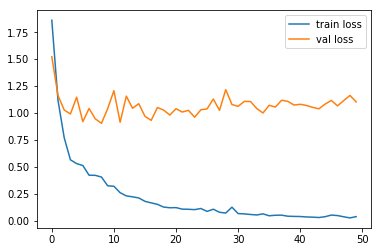

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

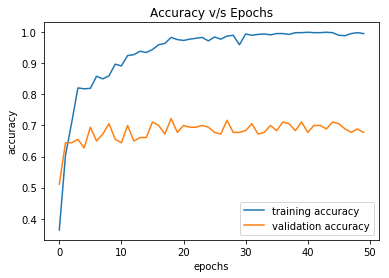

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(0)
plt.plot(r.history['accuracy'], label = 'training accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

